# 1. Preprocessing the Dataset

### 1.1 Checking for Files

First, we need to ensure that all required `target_cued.csv & target_uncued.csv` files are present for each participant, each experiment, and each emotion. To accomplish this, we iterate over the directories and subdirectories until we reach the end, searching specifically for file named **"target_cued.csv" & "target_uncued.csv"** (which is the file we need).

If the file is found, we proceed with checking other folders. If it is not found, we add the current file path to a `missing_files` list. 

Finally, after iterating over all folders and subfolders, we check if there are any entries in the `missing_files` array. If so, we print those paths to identify the missing files.


In [33]:
import os

def check_for_files(root_folder):
    missing_files = []  # To keep track of any missing files

    # List all subfolders in the root data folder
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        for block in ['E1', 'E2', 'E3']:
            emotion_path = os.path.join(subfolder_path, block)
            for number in ["1","2"]:
                target_path=os.path.join(emotion_path, number)

                target_file_cued = os.path.join(target_path, 'target_cued.csv')
                target_file_uncued=os.path.join(target_path, 'target_uncued.csv')
                #print(target_file_cued)
                #print(target_file_uncued)
                # Check if target.csv exists in each experiment folder
                if not os.path.isfile(target_file_cued):
                    missing_files.append(target_file_cued)
                if not os.path.isfile(target_file_uncued):
                    missing_files.append(target_file_uncued)

    if missing_files:
        print("Missing csv files:")
        for file_path in missing_files:
            print(file_path)
    else:
        print("All csv files are present.")

root_folder = "D3-12"
check_for_files(root_folder)

All csv files are present.


- This means that participant named ANT does not have all the files.
Thus, we have to remove this participant folder.

### 1.2 Merging The Dataset

As we were given in the assignment that, the data was collected in two different sets for the same emotion block, so that participant may not get fatigued. 

But, for our analysis we have to merge the data across these sets into one. 

Hence, for each participant and for each block we will now have only two files, one will be target_cued.csv and one will be target_uncued.csv.

Hence, I merged the data across those files and created a new folder- `Trials`, which will now have the merged `target_cued.csv` and `target_uncued.csv`.



In [34]:
import os
import pandas as pd
import numpy as np

def merge_files(root_folder):
    for participant in os.listdir(root_folder):
        participant_path = os.path.join(root_folder,participant)
        for emotions in os.listdir(participant_path):
            emotion_path = os.path.join(participant_path,emotions)
            target_cued_1 = None
            target_cued_2 = None
            target_uncued_1 = None
            target_uncued_2 = None
            for number in ["1","2"]:
                target_path=os.path.join(emotion_path, number)
                target_file_cued = os.path.join(target_path, 'target_cued.csv')
                target_file_uncued=os.path.join(target_path, 'target_uncued.csv')
                if(number=="1"):
                    target_cued_1 = pd.read_csv(target_file_cued)
                    target_uncued_1=pd.read_csv(target_file_uncued)
                else:
                    target_cued_2=pd.read_csv(target_file_cued)
                    target_uncued_2=pd.read_csv(target_file_uncued)

            combined_cued = pd.concat([target_cued_1, target_cued_2], ignore_index=True, sort=False)
            combined_uncued = pd.concat([target_uncued_1, target_uncued_2], ignore_index=True)
            os.makedirs(emotion_path+"/Trials", exist_ok=True)
            combined_cued.to_csv(emotion_path+"/Trials"+"/target_cued.csv",index=False)
            combined_uncued.to_csv(emotion_path+"/Trials"+"/target_uncued.csv",index=False)


merge_files("D3-12")

### 1.3 Checking for Class Distributions

Next I proceeded to check for the class distributions so as to get a better idea of the number of trials for each emotion across the whole dataset and plotted a pie chart for the same.


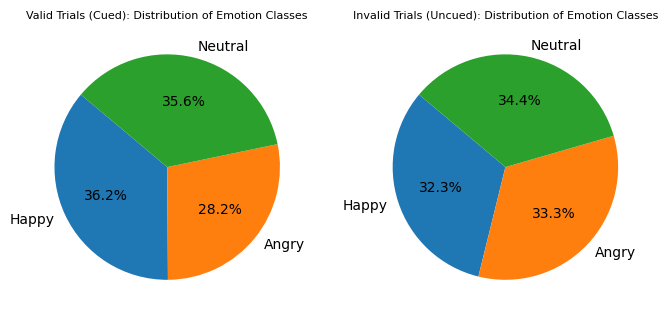

In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def check_for_class_count(root_folder):
    TARGET_CUED=[0,0,0]
    TARGET_UNCUED=[0,0,0]
    # List all subfolders in the root data folder
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        ind=0
        for block in ["E1/Trials","E2/Trials","E3/Trials"]:
            file_path = os.path.join(subfolder_path, block)
            cued_file = os.path.join(file_path, 'target_cued.csv')
            uncued_file =  os.path.join(file_path, 'target_uncued.csv')
            cued = pd.read_csv(cued_file)
            uncued = pd.read_csv(uncued_file)
            row_count=cued.shape[0]
            TARGET_CUED[ind]+=row_count
            row_count=uncued.shape[0]
            TARGET_UNCUED[ind]+=row_count
            ind+=1

    
    data_cued = {
        'Emotion': ['Happy', 'Angry', 'Neutral'],
        'Count': TARGET_CUED
    }
    data_uncued = {
        'Emotion': ['Happy', 'Angry', 'Neutral'],
        'Count': TARGET_UNCUED
    }
    df_cued = pd.DataFrame(data_cued)
    df_uncued = pd.DataFrame(data_uncued)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))


    ax1.pie(df_cued['Count'], labels=df_cued['Emotion'], autopct='%1.1f%%', startangle=140)
    ax1.set_title("Valid Trials (Cued): Distribution of Emotion Classes", fontsize=8)
    
    ax2.pie(df_uncued['Count'], labels=df_uncued['Emotion'], autopct='%1.1f%%', startangle=140)
    ax2.set_title("Invalid Trials (Uncued): Distribution of Emotion Classes", fontsize=8)
    plt.show()                



root_folder = "D3-12"
check_for_class_count(root_folder)

### 1.4 Cleaning the Data and Making a New CSV File

After deleting the data for participant `AYP`, as that was empty, I found out that the first column, which contains the names of the images presented as stimuli to each participant, can also be removed. Also column which have no values for entire rows can be deleted also.

As specified in the assignment, we need to eliminate columns from **t1 to t86**, which represent pupil diameter during the fixation period. I proceeded to remove these columns to clean the dataset. 

After cleaning, I created a new CSV file for each emption block, and named it `new_target_cued.csv` and `new_target_uncued.csv` in the `Trials` folder.

In [36]:
import os
import csv
import pandas as pd


def delete_cols(file,indexes):
    empty_cols=[]
    new_file = file.drop(file.columns[indexes],axis=1)
    new_file = new_file.drop(new_file.columns[4:90],axis=1)
    for i in range(4,len(new_file.columns)):
        col=new_file[new_file.columns[i]]
        avg=col.mean(skipna=True)
        if(pd.isna(avg)):
           empty_cols.append(i)
    if(empty_cols!=[]):
        new_file = new_file.drop(new_file.columns[empty_cols],axis=1)
    return new_file

def preprocess_data(root_folder):

    # List all subfolders in the root data folder
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        for block in ['E1', 'E2', 'E3']:
            exp_path = os.path.join(subfolder_path, block)
            target_cued = os.path.join(exp_path, 'Trials/target_cued.csv')
            target_uncued = os.path.join(exp_path, 'Trials/target_uncued.csv')

            old_target_cued_file = pd.read_csv(target_cued)
            old_target_uncued_file = pd.read_csv(target_uncued)
            index=[0]

            new_target_cued_file = delete_cols(old_target_cued_file,index)
            new_target_uncued_file = delete_cols(old_target_uncued_file,index)
            new_file_path_cued=os.path.join(exp_path,'Trials/new_target_cued.csv')
            new_file_path_uncued = os.path.join(exp_path,'Trials/new_target_uncued.csv')

            pd.DataFrame.to_csv(new_target_cued_file,new_file_path_cued,index=False)
            pd.DataFrame.to_csv(new_target_uncued_file,new_file_path_uncued,index=False)
            print("Data Saved for file: ",new_file_path_cued)
            print("Data Saved for file: ",new_file_path_uncued)


root_folder = "D3-12"
preprocess_data(root_folder)

Data Saved for file:  D3-12\ADB\E1\Trials/new_target_cued.csv
Data Saved for file:  D3-12\ADB\E1\Trials/new_target_uncued.csv
Data Saved for file:  D3-12\ADB\E2\Trials/new_target_cued.csv
Data Saved for file:  D3-12\ADB\E2\Trials/new_target_uncued.csv
Data Saved for file:  D3-12\ADB\E3\Trials/new_target_cued.csv
Data Saved for file:  D3-12\ADB\E3\Trials/new_target_uncued.csv
Data Saved for file:  D3-12\AMR\E1\Trials/new_target_cued.csv
Data Saved for file:  D3-12\AMR\E1\Trials/new_target_uncued.csv
Data Saved for file:  D3-12\AMR\E2\Trials/new_target_cued.csv
Data Saved for file:  D3-12\AMR\E2\Trials/new_target_uncued.csv
Data Saved for file:  D3-12\AMR\E3\Trials/new_target_cued.csv
Data Saved for file:  D3-12\AMR\E3\Trials/new_target_uncued.csv
Data Saved for file:  D3-12\ASL\E1\Trials/new_target_cued.csv
Data Saved for file:  D3-12\ASL\E1\Trials/new_target_uncued.csv
Data Saved for file:  D3-12\ASL\E2\Trials/new_target_cued.csv
Data Saved for file:  D3-12\ASL\E2\Trials/new_target_unc

# 2. Reaction Time

### 2.1 Calculating the Median for Each Participant's Data

To condense each particpant's reaction time for a single eccentricity and for each emotion, we have to take median of all the rows where that eccentricity is. 

Taking median ensures that reaction times don't get skewed by outliers, like occasional slow or fast responses that are not typical of a participant's usual response pattern.The median provides a more robust measure of central tendency in such cases, as it is less influenced by extreme values compared to the mean. 

Additionally, since there are no NA values in the reaction time columns, we can proceed without any need for handling missing data.

Hence through this step, we get the reaction times of each participant for cued and uncued experiments and for each emotion too along with the eccentricities.

And after taking medians, we save this whole data in a dictionary, where keys are the participant name and value is further a dictionary, which has keys as emotion condition along with its eccentricity.

In [37]:
import os
import pandas as pd
import numpy as np

def median_for_response_time(root_folder,condition,intermediate_dict):
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        for block in ['E1', 'E2', 'E3']:
            exp_path = os.path.join(subfolder_path, block)
            target_file = os.path.join(exp_path, f'Trials/new_target_{condition}.csv')
            old_file = pd.read_csv(target_file)
            median_reaction_time=old_file["response_time"].median()
            intermediate_dict[subfolder+"_"+condition].append(median_reaction_time)

      

def init_dict(root_folder,condition):
    intermediate_dict={}
    intermediate_dict_rt={}
    for subfolder in os.listdir(root_folder):
        intermediate_dict[subfolder+"_"+condition]={}
        intermediate_dict_rt[subfolder+"_"+condition]=[]

    return intermediate_dict,intermediate_dict_rt

                        

def prepare_data_for_box_plot(root_folder,condition,intermediate_dict,intermediate_dict_rt):
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        for block in ['E1', 'E2', 'E3']:
            exp_path = os.path.join(subfolder_path, block)
            target_file_path = os.path.join(exp_path, f'Trials/new_target_{condition}.csv')
            target_file = pd.read_csv(target_file_path)

            emotion_0 = target_file[target_file["cue_location"] == 0]
            emotion_4 = target_file[target_file["cue_location"].isin([-4, 4])]
            emotion_8 = target_file[target_file["cue_location"].isin([-8, 8])]
            emotion_16 = target_file[target_file["cue_location"].isin([-16, 16])]

            emotion_0_rt = np.array(emotion_0["response_time"])
            emotion_4_rt = np.array(emotion_4["response_time"])
            emotion_8_rt = np.array(emotion_8["response_time"])
            emotion_16_rt = np.array(emotion_16["response_time"])


            intermediate_dict[subfolder+"_"+condition][f"{block}_0"]=emotion_0_rt
            intermediate_dict[subfolder+"_"+condition][f"{block}_4"]=emotion_4_rt
            intermediate_dict[subfolder+"_"+condition][f"{block}_8"]=emotion_8_rt
            intermediate_dict[subfolder+"_"+condition][f"{block}_16"]=emotion_16_rt

            intermediate_dict_rt[subfolder+"_"+condition].append(emotion_0["response_time"].median())
            intermediate_dict_rt[subfolder+"_"+condition].append(emotion_4["response_time"].median())
            intermediate_dict_rt[subfolder+"_"+condition].append(emotion_8["response_time"].median())
            intermediate_dict_rt[subfolder+"_"+condition].append(emotion_16["response_time"].median())




root_folder = "D3-12"

intermediate_dict_cued,intermediate_dict_cued_rt=init_dict(root_folder,"cued")
intermediate_dict_uncued,intermediate_dict_uncued_rt=init_dict(root_folder,"uncued")



prepare_data_for_box_plot(root_folder,"cued",intermediate_dict_cued,intermediate_dict_cued_rt)
prepare_data_for_box_plot(root_folder,"uncued",intermediate_dict_uncued,intermediate_dict_uncued_rt)


### 2.2 Calculating the Overall Median for Cued and Uncued Conditions

After getting the medians for each participant across each condition and each emotion along with each eccentricity, now we need to further condense this data to a single array for each condition and for each emotion.

Now, we have a dictionary which has this shape of array for each emotion Participants_trials_for_that_eccentricity * 1

Hence, now we need to condense all such arrays of every participant into one single array.

To do this, we again repeat the same process of taking medians across each of the columns, this gives us a single dimensional array for each emotion & eccentricity.

Next, we saved this data, in the below format of the dictionary and we have two dictionary one for cued & one for uncued condition. 

```
FINAL_MEDIAN_DICT = {  
    "E1":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E2":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E3":{
        0:[],
        4:[],
        8:[],
        16:[]
    }
}
```

In [38]:
import pandas as pd
import seaborn as sns


FINAL_MEDIAN_DICT_CUED = {
    "E1":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E2":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E3":{
        0:[],
        4:[],
        8:[],
        16:[]
    }
}


FINAL_MEDIAN_DICT_UNCUED = {
    "E1":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E2":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E3":{
        0:[],
        4:[],
        8:[],
        16:[]
    }
}

for key,val in intermediate_dict_cued.items():
    values_of_this_participant=val
    for emotion in ["E1","E2","E3"]:
        for eccentricity in [0,4,8,16]:
            dict_key = emotion+"_"+str(eccentricity)
            emotion_and_eccentricity_values = values_of_this_participant[dict_key]
            median_for_this_condition = np.median(emotion_and_eccentricity_values)
            FINAL_MEDIAN_DICT_CUED[emotion][eccentricity].append(median_for_this_condition)
            


for key,val in intermediate_dict_uncued.items():
    values_of_this_participant=val
    for emotion in ["E1","E2","E3"]:
        for eccentricity in [0,4,8,16]:
            dict_key = emotion+"_"+str(eccentricity)
            emotion_and_eccentricity_values = values_of_this_participant[dict_key]
            median_for_this_condition = np.median(emotion_and_eccentricity_values)
            FINAL_MEDIAN_DICT_UNCUED[emotion][eccentricity].append(median_for_this_condition)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### 2.3 Plotting Reaction Time Graphs

Now, we have the data for each emotion and for each eccentricity, we simply proceed to plot this data using matplotlib library of python.

Here, I have used box plot to represent the median for each emotion and each eccentricity. 


- **X-Axis**: Represents the three emotions—E1, E2, and E3, along with the eccentricity condition.
- **Y-Axis**: Represents the reaction time values.


## Plot For Cued Condition

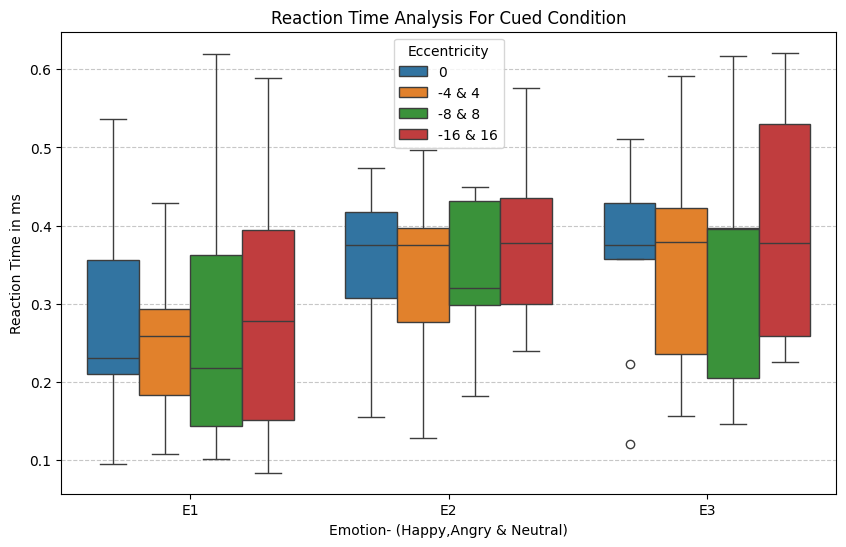

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = []
emotion_labels = []
eccentricities = []
eccentricity_values = ["0", "4", "8", "16"]  

for emotion, ecc_dict in FINAL_MEDIAN_DICT_CUED.items():
    for ecc in eccentricity_values:
        data.extend(ecc_dict[int(ecc)])  
        emotion_labels.extend([emotion] * len(ecc_dict[int(ecc)]))  
        eccentricities.extend([ecc] * len(ecc_dict[int(ecc)]))   


df = pd.DataFrame({"Reaction Time (ms)": data, 
                   "Emotion": emotion_labels, 
                   "Eccentricity": eccentricities})


ecc_palette = {
    "0": "#1f77b4",
    "4": "#ff7f0e",
    "8": "#2ca02c",
    "16": "#d62728"
}


plt.figure(figsize=(10, 6))
graph=sns.boxplot(x="Emotion", y="Reaction Time (ms)", hue="Eccentricity", data=df, palette=ecc_palette)

handles, labels = graph.get_legend_handles_labels()
custom_labels = {"0": "0", "4": "-4 & 4", "8": "-8 & 8", "16": "-16 & 16"}  
new_labels = []
for label in labels:
    new_labels.append(custom_labels[label])


plt.xlabel("Emotion- (Happy,Angry & Neutral)")
plt.ylabel("Reaction Time in ms")
plt.title("Reaction Time Analysis For Cued Condition")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(handles, new_labels, title="Eccentricity")
plt.show()

## Plot for Uncued Condition

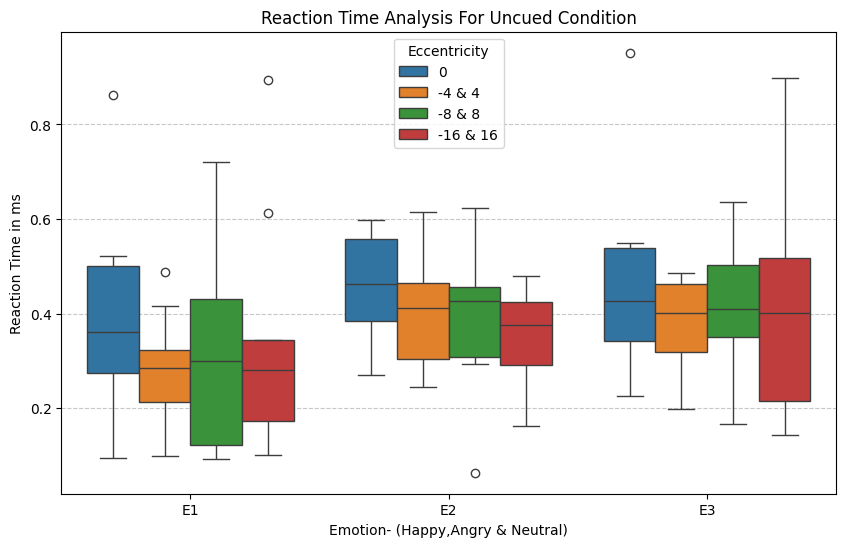

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = []
emotion_labels = []
eccentricities = []
eccentricity_values = ["0", "4", "8", "16"]  

for emotion, ecc_dict in FINAL_MEDIAN_DICT_UNCUED.items():
    for ecc in eccentricity_values:
        data.extend(ecc_dict[int(ecc)])  
        emotion_labels.extend([emotion] * len(ecc_dict[int(ecc)]))  
        eccentricities.extend([ecc] * len(ecc_dict[int(ecc)]))   


df = pd.DataFrame({"Reaction Time (ms)": data, 
                   "Emotion": emotion_labels, 
                   "Eccentricity": eccentricities})


ecc_palette = {
    "0": "#1f77b4",
    "4": "#ff7f0e",
    "8": "#2ca02c",
    "16": "#d62728"
}


plt.figure(figsize=(10, 6))
graph=sns.boxplot(x="Emotion", y="Reaction Time (ms)", hue="Eccentricity", data=df, palette=ecc_palette)

handles, labels = graph.get_legend_handles_labels()
custom_labels = {"0": "0", "4": "-4 & 4", "8": "-8 & 8", "16": "-16 & 16"}  
new_labels = []
for label in labels:
    new_labels.append(custom_labels[label])


plt.xlabel("Emotion- (Happy,Angry & Neutral)")
plt.ylabel("Reaction Time in ms")
plt.title("Reaction Time Analysis For Uncued Condition")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(handles, new_labels, title="Eccentricity")
plt.show()

## Combine Plot for Cued & Uncued Condition

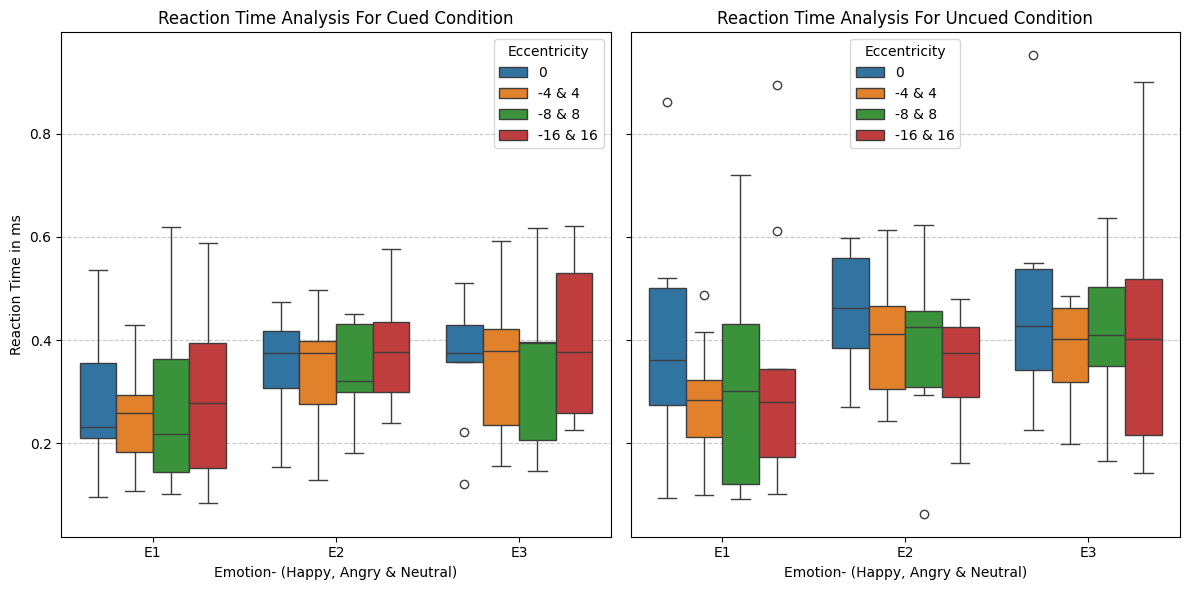

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


eccentricity_values = ["0", "4", "8", "16"]
ecc_palette = {"0": "#1f77b4", "4": "#ff7f0e", "8": "#2ca02c", "16": "#d62728"}
custom_labels = {"0": "0", "4": "-4 & 4", "8": "-8 & 8", "16": "-16 & 16"}


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)


data, emotion_labels, eccentricities = [], [], []
for emotion, ecc_dict in FINAL_MEDIAN_DICT_CUED.items():
    for ecc in eccentricity_values:
        data.extend(ecc_dict[int(ecc)])
        emotion_labels.extend([emotion] * len(ecc_dict[int(ecc)]))
        eccentricities.extend([ecc] * len(ecc_dict[int(ecc)]))

df_cued = pd.DataFrame({"Reaction Time (ms)": data, "Emotion": emotion_labels, "Eccentricity": eccentricities})

sns.boxplot(x="Emotion", y="Reaction Time (ms)", hue="Eccentricity", data=df_cued, palette=ecc_palette, ax=ax1)
ax1.set_xlabel("Emotion- (Happy, Angry & Neutral)")
ax1.set_ylabel("Reaction Time in ms")
ax1.set_title("Reaction Time Analysis For Cued Condition")
ax1.grid(axis="y", linestyle="--", alpha=0.7)

handles, labels = ax1.get_legend_handles_labels()
new_labels = [custom_labels[label] for label in labels]
ax1.legend(handles, new_labels, title="Eccentricity")


data, emotion_labels, eccentricities = [], [], []
for emotion, ecc_dict in FINAL_MEDIAN_DICT_UNCUED.items():
    for ecc in eccentricity_values:
        data.extend(ecc_dict[int(ecc)])
        emotion_labels.extend([emotion] * len(ecc_dict[int(ecc)]))
        eccentricities.extend([ecc] * len(ecc_dict[int(ecc)]))

df_uncued = pd.DataFrame({"Reaction Time (ms)": data, "Emotion": emotion_labels, "Eccentricity": eccentricities})

sns.boxplot(x="Emotion", y="Reaction Time (ms)", hue="Eccentricity", data=df_uncued, palette=ecc_palette, ax=ax2)
ax2.set_xlabel("Emotion- (Happy, Angry & Neutral)")
ax2.set_title("Reaction Time Analysis For Uncued Condition")
ax2.grid(axis="y", linestyle="--", alpha=0.7)

handles, labels = ax2.get_legend_handles_labels()
new_labels = [custom_labels[label] for label in labels]
ax2.legend(handles, new_labels, title="Eccentricity")


plt.tight_layout()
plt.show()


# 3. Pupil Diameter Analysis

### 3.1 Taking Average values for each participant


We start taking average values across each column for every `target_cued.csv` & `target_uncued.csv` for each of the eccentricity.  

Now as we know that each row does not have values present for every column hence, there would be some rows which have `NA` in place and we have to ignore such rows while taking mean.

Hence we use `skipna=True` while taking mean of the columns.

After taking the mean for each eccentricity, we get a single 1D array, for each eccentricity of that particular file. Next, we saved this data in a dictionary object with keys as emotion and values again as a dictionary, which has keys as eccentricity and value as a list of arrays, with each array representing averages for a participant. 

In [42]:
import os
import numpy as np
import pandas as pd

def init_dict(root_folder,condition):
    intermediate_dict_mean={}
    #intermediate_dict_rt={}
    for subfolder in os.listdir(root_folder):
        intermediate_dict_mean[subfolder+"_"+condition]={}
       

    return intermediate_dict_mean



def find_mean_for_participant_data(root_folder,condition,intermediate_dict_mean):
    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        for block in ['E1', 'E2', 'E3']:
            exp_path = os.path.join(subfolder_path, block)
            target_file_path = os.path.join(exp_path, f'Trials/new_target_{condition}.csv')
            target_file = pd.read_csv(target_file_path)

            emotion_0 = target_file[target_file["cue_location"] == 0].iloc[:,4:]
            emotion_4 = target_file[target_file["cue_location"].isin([-4, 4])].iloc[:,4:]
            emotion_8 = target_file[target_file["cue_location"].isin([-8, 8])].iloc[:,4:]
            emotion_16 = target_file[target_file["cue_location"].isin([-16, 16])].iloc[:,4:]

            #print(emotion_0.shape)
            #print(emotion_4.shape)
            #print(emotion_8.shape)
            #print(emotion_16.shape)

            #print(emotion_0.columns)
           

            emotion_0_mean = emotion_0.mean(skipna=True)
            emotion_4_mean = emotion_4.mean(skipna=True)
            emotion_8_mean = emotion_8.mean(skipna=True)
            emotion_16_mean = emotion_16.mean(skipna=True)


            intermediate_dict_mean[subfolder+"_"+condition][f"{block}_0"]=emotion_0_mean
            intermediate_dict_mean[subfolder+"_"+condition][f"{block}_4"]=emotion_4_mean
            intermediate_dict_mean[subfolder+"_"+condition][f"{block}_8"]=emotion_8_mean
            intermediate_dict_mean[subfolder+"_"+condition][f"{block}_16"]=emotion_16_mean

       




root_folder = "D3-12"

intermediate_dict_cued_mean=init_dict(root_folder,"cued")
intermediate_dict_uncued_mean=init_dict(root_folder,"uncued")


find_mean_for_participant_data(root_folder,"cued",intermediate_dict_cued_mean)

find_mean_for_participant_data(root_folder,"uncued",intermediate_dict_uncued_mean)


MEAN_DICT_CUED = {
    "E1":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E2":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E3":{
        0:[],
        4:[],
        8:[],
        16:[]
    }
}


MEAN_DICT_UNCUED = {
    "E1":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E2":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E3":{
        0:[],
        4:[],
        8:[],
        16:[]
    }
}

for key,val in intermediate_dict_cued_mean.items():
    values_of_this_participant=val
    for emotion in ["E1","E2","E3"]:
        for eccentricity in [0,4,8,16]:
            dict_key = emotion+"_"+str(eccentricity)
            emotion_and_eccentricity_values = values_of_this_participant[dict_key]
            MEAN_DICT_CUED[emotion][eccentricity].append(np.array(emotion_and_eccentricity_values))




for key,val in intermediate_dict_uncued_mean.items():
    values_of_this_participant=val
    for emotion in ["E1","E2","E3"]:
        for eccentricity in [0,4,8,16]:
            dict_key = emotion+"_"+str(eccentricity)
            emotion_and_eccentricity_values = values_of_this_participant[dict_key]
            MEAN_DICT_UNCUED[emotion][eccentricity].append(np.array(emotion_and_eccentricity_values))

### 3.2 Taking Final Average Values for each experiment

Now in earlier step we have got average values across each column for participants, hence in total we got 9 arrays for each eccentricity and emotion condition. (9 participants were there, as 1 participant had no data) 

Now we proceed further, and take average across those 9 arrays to get a single array.

Hence, now we will have just a single array for combination of eccentricity and emotion.

In [43]:
FINAL_MEAN_DICT_CUED = {
    "E1":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E2":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E3":{
        0:[],
        4:[],
        8:[],
        16:[]
    }
}

FINAL_MEAN_DICT_UNCUED = {
    "E1":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E2":{
        0:[],
        4:[],
        8:[],
        16:[]
    },
    "E3":{
        0:[],
        4:[],
        8:[],
        16:[]
    }
}


for key,val in MEAN_DICT_CUED.items():
    all_eccentricity_data = val
    for eccentricity in [0,4,8,16]:
        current_eccentricity_data = all_eccentricity_data[eccentricity]
        df=pd.DataFrame(current_eccentricity_data)
        across_participant_mean = df.mean(skipna=True)
        FINAL_MEAN_DICT_CUED[key][eccentricity]=np.array(across_participant_mean)



for key,val in MEAN_DICT_UNCUED.items():
    all_eccentricity_data = val
    for eccentricity in [0,4,8,16]:
        current_eccentricity_data = all_eccentricity_data[eccentricity]
        df=pd.DataFrame(current_eccentricity_data)
        across_participant_mean = df.mean(skipna=True)
        FINAL_MEAN_DICT_UNCUED[key][eccentricity]=np.array(across_participant_mean)

### 3.3 Plotting the Pupil Diameter vs time Graph

Now we have got the average time series data for each combination of eccentricity & emotion. Hence we proceed further by making a plot for pupil diameter.

## Plot For Cued Condition

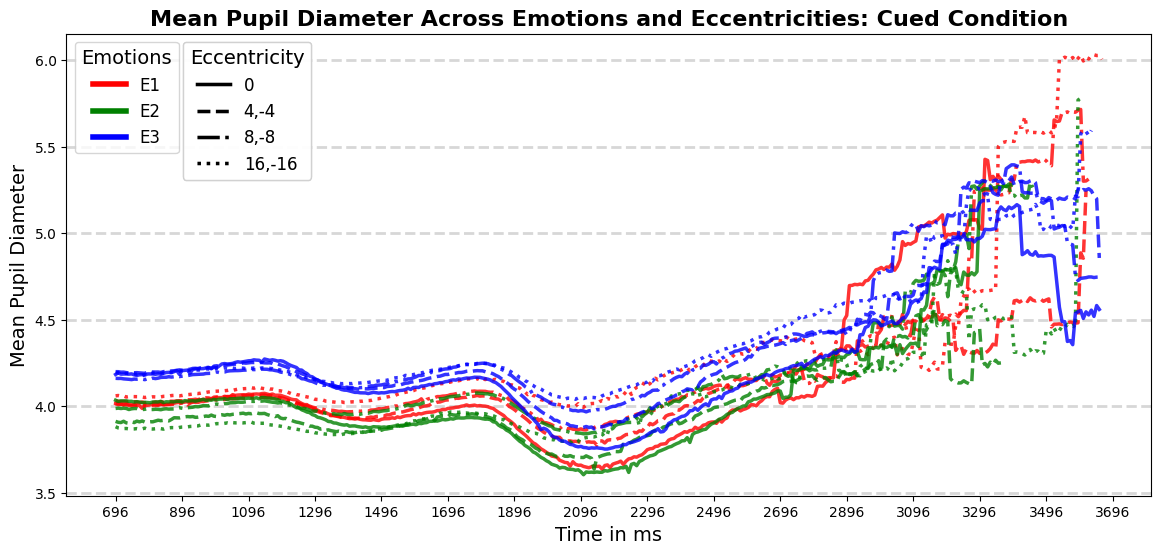

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

def convert_index_to_time(index_max_size):
    times = []
    for i in range(index_max_size):
        times.append((i+87)*8)
    return times

color_map = {"E1": "red", "E2": "green", "E3": "blue"}


line_styles = {0: "-", 4: "--", 8: "-.", 16: ":"}

plt.figure(figsize=(14, 6))
ax = plt.gca()
#ax.set_facecolor("black")

all_times = []

for emotion, ecc_dict in FINAL_MEAN_DICT_CUED.items():
    for ecc, values in ecc_dict.items():
        times = convert_index_to_time(len(values))
        all_times.extend(times)
        plt.plot(
            times, values,
            color=color_map[emotion], linestyle=line_styles[ecc],
            linewidth=2.5, alpha=0.8,
            label=f"{emotion} (Ecc={ecc})"
        )


handles, labels = plt.gca().get_legend_handles_labels()
unique = {}
for handle, label in zip(handles, labels):
    if label not in unique:
        unique[label] = handle

min_time = min(all_times)
max_time = max(all_times)
interval = 200 
xticks = list(range(min_time, max_time + interval, interval))

plt.xticks(xticks, color="black")
plt.yticks(color="black")
plt.xlabel("Time in ms", fontsize=14)
plt.ylabel("Mean Pupil Diameter", fontsize=14)
plt.title("Mean Pupil Diameter Across Emotions and Eccentricities: Cued Condition", fontsize=16, fontweight="bold")


emotion_handles = []
for emotion, color in color_map.items():
    handle = mlines.Line2D([], [], color=color, linewidth=4, label=emotion)
    emotion_handles.append(handle)

legend1 = plt.legend(handles=emotion_handles, title="Emotions", fontsize=12, title_fontsize=14, loc="upper left", frameon=True, bbox_to_anchor=(0.00, 1))


style_handles = []
for ecc, style in line_styles.items():
    if(ecc==0):
        handle = mlines.Line2D([], [], color="black", linestyle=style, linewidth=2.5, label=f"{ecc}")
    else:
        handle = mlines.Line2D([], [], color="black", linestyle=style, linewidth=2.5, label=f"{ecc},{-ecc}")
    style_handles.append(handle)

legend2 = plt.legend(handles=style_handles, title="Eccentricity", fontsize=12, title_fontsize=14, loc="upper left", frameon=True, bbox_to_anchor=(0.1, 1))


plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.grid(axis="y", linestyle="--", alpha=0.5,linewidth=2.0)
plt.show()



## Plot For Uncued Condition

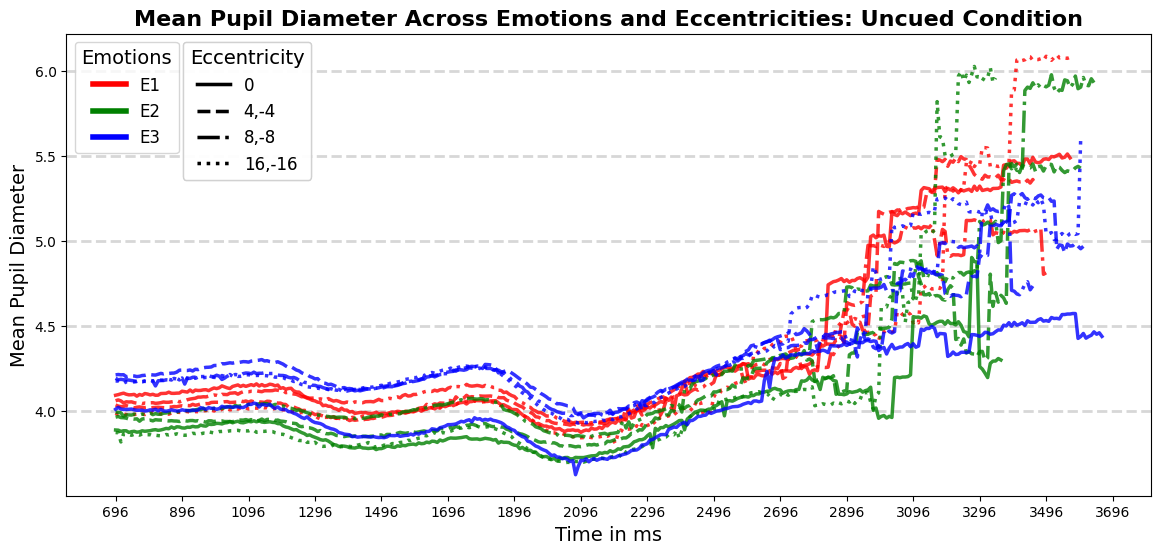

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

def convert_index_to_time(index_max_size):
    times = []
    for i in range(index_max_size):
        times.append((i+87)*8)
    return times

color_map = {"E1": "red", "E2": "green", "E3": "blue"}


line_styles = {0: "-", 4: "--", 8: "-.", 16: ":"}

plt.figure(figsize=(14, 6))
ax = plt.gca()
#ax.set_facecolor("black")

all_times = []

for emotion, ecc_dict in FINAL_MEAN_DICT_UNCUED.items():
    for ecc, values in ecc_dict.items():
        times = convert_index_to_time(len(values))
        all_times.extend(times)
        plt.plot(
            times, values,
            color=color_map[emotion], linestyle=line_styles[ecc],
            linewidth=2.5, alpha=0.8,
            label=f"{emotion} (Ecc={ecc})"
        )


handles, labels = plt.gca().get_legend_handles_labels()
unique = {}
for handle, label in zip(handles, labels):
    if label not in unique:
        unique[label] = handle

min_time = min(all_times)
max_time = max(all_times)
interval = 200 
xticks = list(range(min_time, max_time + interval, interval))

plt.xticks(xticks, color="black")
plt.yticks(color="black")
plt.xlabel("Time in ms", fontsize=14)
plt.ylabel("Mean Pupil Diameter", fontsize=14)
plt.title("Mean Pupil Diameter Across Emotions and Eccentricities: Uncued Condition", fontsize=16, fontweight="bold")


emotion_handles = []
for emotion, color in color_map.items():
    handle = mlines.Line2D([], [], color=color, linewidth=4, label=emotion)
    emotion_handles.append(handle)

legend1 = plt.legend(handles=emotion_handles, title="Emotions", fontsize=12, title_fontsize=14, loc="upper left", frameon=True, bbox_to_anchor=(0.00, 1))


style_handles = []
for ecc, style in line_styles.items():
    if(ecc==0):
        handle = mlines.Line2D([], [], color="black", linestyle=style, linewidth=2.5, label=f"{ecc}")
    else:
        handle = mlines.Line2D([], [], color="black", linestyle=style, linewidth=2.5, label=f"{ecc},{-ecc}")
    style_handles.append(handle)

legend2 = plt.legend(handles=style_handles, title="Eccentricity", fontsize=12, title_fontsize=14, loc="upper left", frameon=True, bbox_to_anchor=(0.1, 1))


plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)

plt.grid(axis="y", linestyle="--", alpha=0.5,linewidth=2.0)
plt.show()



## Combine Plot for Cued & Uncued Condition

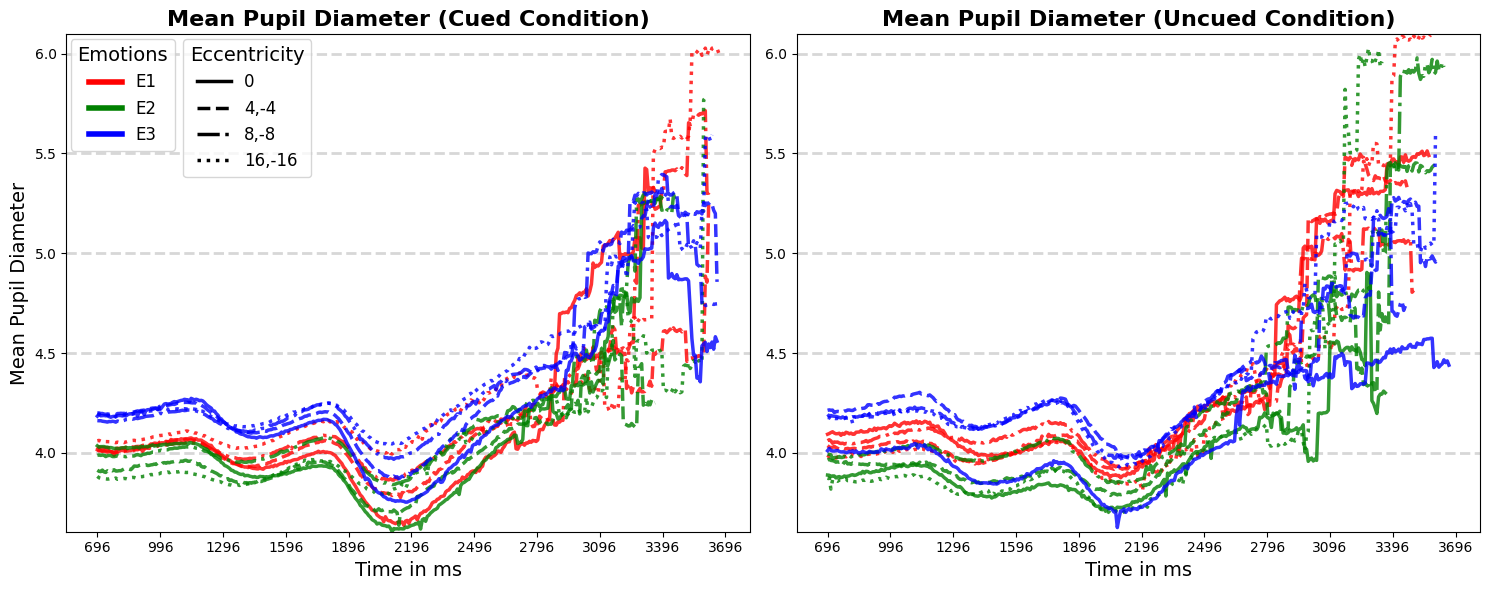

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

def convert_index_to_time(index_max_size):
    times = []
    for i in range(index_max_size):
        times.append((i + 87) * 8)
    return times


color_map = {"E1": "red", "E2": "green", "E3": "blue"}
line_styles = {0: "-", 4: "--", 8: "-.", 16: ":"}


fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax1 = axes[0]
all_times = []
all_values = []  

for emotion, ecc_dict in FINAL_MEAN_DICT_CUED.items():
    for ecc, values in ecc_dict.items():
        times = convert_index_to_time(len(values))
        all_times.extend(times)
        all_values.extend(values) 
        ax1.plot(
            times, values,
            color=color_map[emotion], linestyle=line_styles[ecc],
            linewidth=2.5, alpha=0.8,
            label=f"{emotion} (Ecc={ecc})"
        )

min_time, max_time = min(all_times), max(all_times)
xticks = list(range(min_time, max_time + 200, 300))

ax1.set_xticks(xticks)
ax1.set_xlabel("Time in ms", fontsize=14)
ax1.set_ylabel("Mean Pupil Diameter", fontsize=14)
ax1.set_title("Mean Pupil Diameter (Cued Condition)", fontsize=16, fontweight="bold")
ax1.grid(axis="y", linestyle="--", alpha=0.5,linewidth=2.0)

ax2 = axes[1]
all_times = []

for emotion, ecc_dict in FINAL_MEAN_DICT_UNCUED.items():
    for ecc, values in ecc_dict.items():
        times = convert_index_to_time(len(values))
        all_times.extend(times)
        all_values.extend(values)  
        ax2.plot(
            times, values,
            color=color_map[emotion], linestyle=line_styles[ecc],
            linewidth=2.5, alpha=0.8,
            label=f"{emotion} (Ecc={ecc})"
        )

min_time, max_time = min(all_times), max(all_times)
xticks = list(range(min_time, max_time + 200,300))

ax2.set_xticks(xticks)
ax2.set_xlabel("Time in ms", fontsize=14)
ax2.set_title("Mean Pupil Diameter (Uncued Condition)", fontsize=16, fontweight="bold")
ax2.grid(axis="y", linestyle="--", alpha=0.5,linewidth=2.0)

y_min, y_max = min(all_values), max(all_values)
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

emotion_handles = []  
for emotion, color in color_map.items():
    handle = mlines.Line2D([], [], color=color, linewidth=4, label=emotion)
    emotion_handles.append(handle)

style_handles = []  
for ecc, style in line_styles.items():
    if ecc == 0:
        handle = mlines.Line2D([], [], color="black", linestyle=style, linewidth=2.5, label=f"{ecc}")
    else:
        handle = mlines.Line2D([], [], color="black", linestyle=style, linewidth=2.5, label=f"{ecc},{-ecc}")
    style_handles.append(handle)

fig.legend(handles=emotion_handles, title="Emotions", fontsize=12, title_fontsize=14, loc="upper left", bbox_to_anchor=(0.045, 0.94), frameon=True)
fig.legend(handles=style_handles, title="Eccentricity", fontsize=12, title_fontsize=14, loc="upper left", bbox_to_anchor=(0.12, 0.94), frameon=True)

plt.tight_layout()
plt.show()


## 4 Supporting Plots
### 4.1 Plot for rate of change of pupil diameter with time (Cued Condition)

After plotting the pupil diameter with time, I analyzed the curve between 1800 ms to 2500 ms, here pupil diameter constricts and dilates and this region corresponds to time after participant sees the stimulus and responds to it till the response time window.


- **X-Axis**: Represents the time in ms
- **Y-Axis**: Represents the Rate of change of pupil diameter with time.


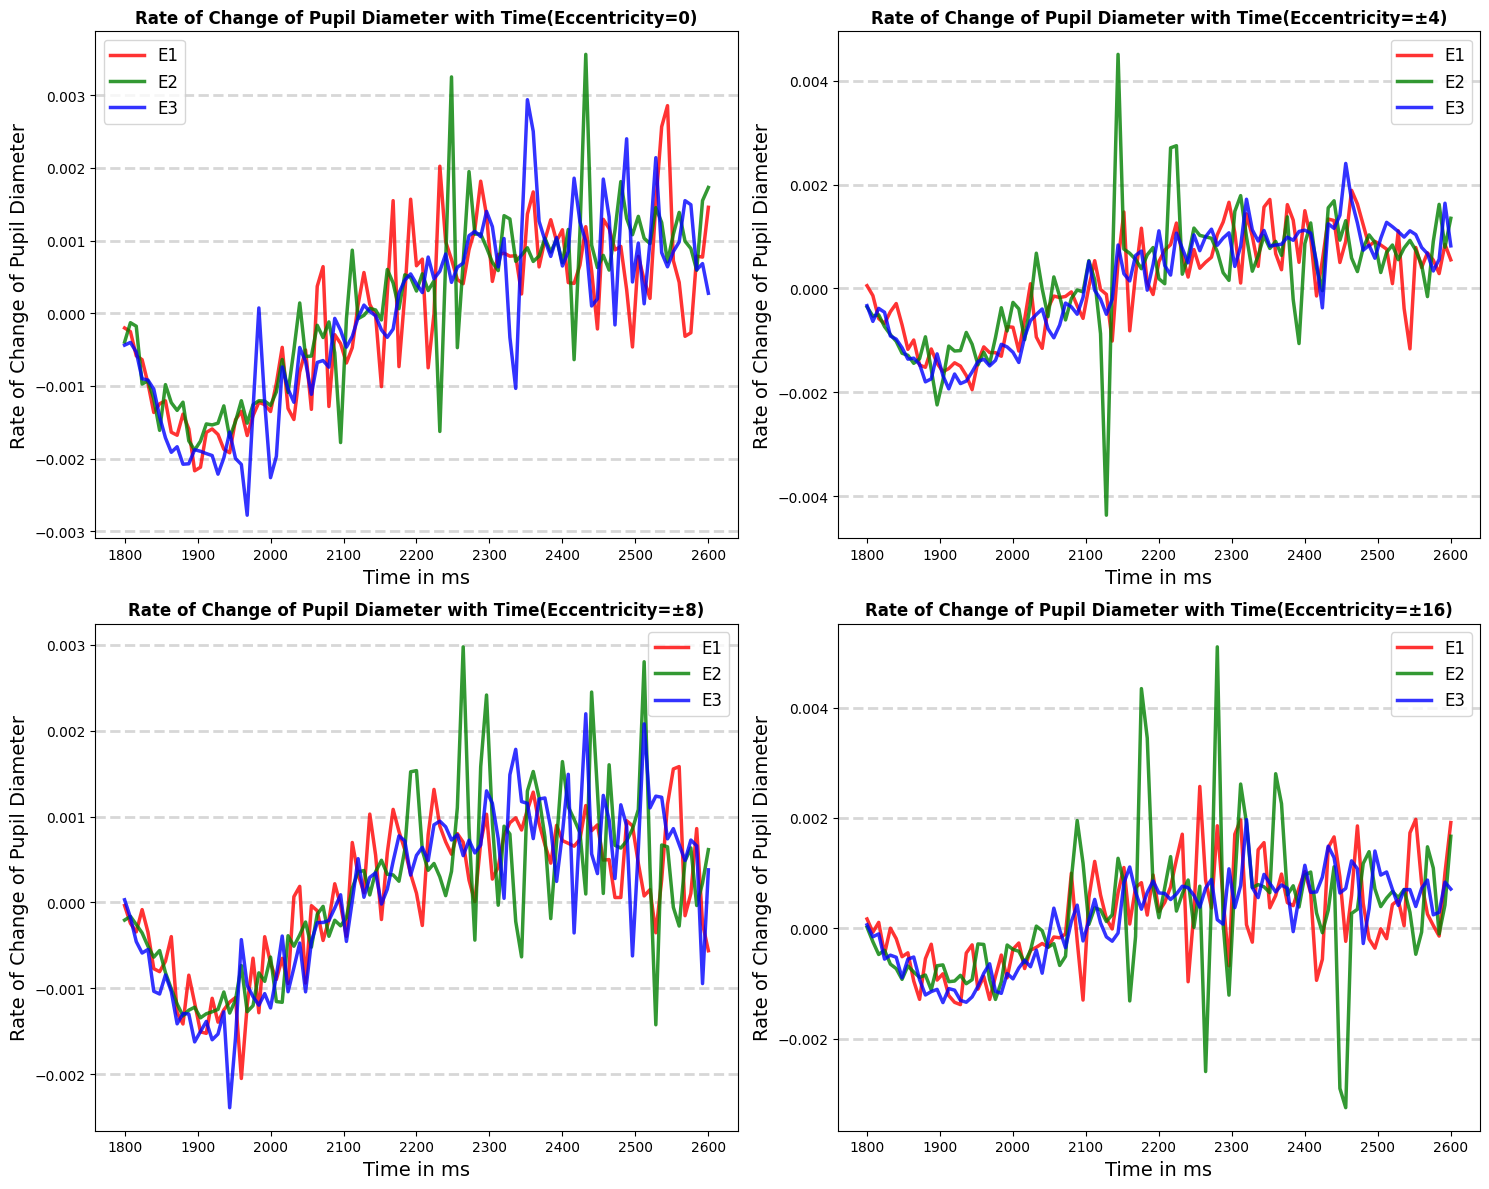

In [47]:
import matplotlib.pyplot as plt
import numpy as np

def convert_index_to_time(index_max_size):
    time_values = []
    for i in range(index_max_size):
        time_values.append((i + 87) * 8)
    return time_values

color_map = {"E1": "red", "E2": "green", "E3": "blue"}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

eccentricities = [0, 4, 8, 16]

for ax, ecc in zip(axes.flat, eccentricities):
    all_times = []
    all_gradients = []  
    
    for emotion, ecc_dict in FINAL_MEAN_DICT_CUED.items():
        if ecc in ecc_dict:
            values = ecc_dict[ecc]
            times = convert_index_to_time(len(values))
            gradients = np.gradient(values, times)
            filtered_indices = [i for i, t in enumerate(times) if 1800 <= t <= 2600]
            filtered_times = [times[i] for i in filtered_indices]
            filtered_gradients = [gradients[i] for i in filtered_indices]
            
            all_times.extend(filtered_times)
            all_gradients.extend(filtered_gradients) 
            ax.plot(
                filtered_times, filtered_gradients,
                color=color_map[emotion],
                linewidth=2.5, alpha=0.8,
                label=f"{emotion}"
            )
    
    ax.set_xlabel("Time in ms", fontsize=14)
    ax.set_ylabel("Rate of Change of Pupil Diameter", fontsize=14)
    if(ecc!=0):
        ax.set_title(f"Rate of Change of Pupil Diameter with Time(Eccentricity=±{ecc})", fontsize=12, fontweight="bold")
    else:
        ax.set_title(f"Rate of Change of Pupil Diameter with Time(Eccentricity={ecc})", fontsize=12, fontweight="bold")
    ax.grid(axis="y", linestyle="--", alpha=0.5, linewidth=2.0)
    ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


In [20]:
import pandas as pd


# Convert dictionary to list format for DataFrame
data_list = []
for emotion, ecc_dict in FINAL_MEAN_DICT_UNCUED.items():
    for ecc, values in ecc_dict.items():
        data_list.append([emotion, ecc] + list(values))  # Ensure `values` is a list


# Create DataFrame
df = pd.DataFrame(data_list, columns=["Emotion", "Eccentricity"] + [f"t{i+87}" for i in range(len(data_list[0])-2)])

# Save to CSV
csv_filename = "uncued_pupil_diameter_data.csv"
df.to_csv(csv_filename, index=False)

print(f"CSV saved as {csv_filename}")


ValueError: 348 columns passed, passed data had 374 columns

In [49]:
import pandas as pd

# Convert dictionary to list format for DataFrame
data_list = []
max_length = 0  # Track max length of pupil diameter data

for emotion, ecc_dict in FINAL_MEAN_DICT_UNCUED.items():
    for ecc, values in ecc_dict.items():
        values = list(values)  # Ensure it's a list
        max_length = max(max_length, len(values))  # Update max length
        data_list.append([emotion, ecc] + values)

# Create column names dynamically
columns = ["Emotion", "Eccentricity"] + [f"t{i+87}" for i in range(max_length)]



# Create DataFrame
df = pd.DataFrame(data_list, columns=columns)

# Save to CSV
csv_filename = "uncued_pupil_diameter_data.csv"
df.to_csv(csv_filename, index=False)

print(f"CSV saved as {csv_filename}")


CSV saved as uncued_pupil_diameter_data.csv


In [51]:
import pandas as pd
import numpy as np

# Convert dictionary to list format for DataFrame
data_list = []

for emotion, ecc_dict in FINAL_MEDIAN_DICT_CUED.items():
    for ecc, values in ecc_dict.items():
        print(emotion,ecc,values)
        if values:  # Ensure there are values to compute median
            reaction_time_median = np.nanmedian(values)
        else:
            print("hh")
            reaction_time_median = float("nan")  # Assign NaN if no values are present

        data_list.append([emotion, ecc,reaction_time_median])

# Create DataFrame
df = pd.DataFrame(data_list, columns=["Emotion", "Eccentricity", "Reaction Time (Median)"])

# Save to CSV
csv_filename = "cued_reaction_time_data.csv"
df.to_csv(csv_filename, index=False)

print(f"CSV saved as {csv_filename}")


E1 0 [0.3553698499890743, 0.5359004999918398, 0.0949157999712042, 0.2888185000000476, 0.3977532500284724, 0.230621799999426, 0.2161867000395432, 0.2101138000016362, 0.1169424998806789]
E1 4 [0.2892442499869503, 0.4143050999846309, 0.18389454999123694, 0.25875580000011666, 0.4290555999614298, 0.1951828000001114, 0.1472549999598413, 0.2932935999997426, 0.10732660000212485]
E1 8 [0.3628283999860286, 0.43353764999483246, 0.10150114999851209, 0.2597389500000986, 0.6190655499813147, 0.1975226000013208, 0.1332823499687947, 0.2178049499989356, 0.14345234993379555]
E1 16 [0.3942521999997552, 0.4281994000048144, 0.1516255000024102, 0.2777071000000433, 0.588332699961029, 0.22180289999960215, 0.08397915004752571, 0.28054190000057133, 0.1520344999153167]
E2 0 [0.4741268999932799, nan, 0.1546244000201113, 0.3350460000001476, 0.43789945001481095, 0.3468900500001837, 0.4100906000239774, 0.40368580000085785, 0.22415945015382022]
E2 4 [0.472300150024239, 0.496475450010621, 0.1288487999700009, 0.27620709